## 颜色变换

In [7]:
from PIL import Image
import numpy as np

In [10]:
a = np.array(Image.open('lane.jpg').convert("L"))  # 灰度
img = Image.fromarray(a.astype("uint8"))
img.save("lane_gray.jpg")

b = 255 - a
im = Image.fromarray(b.astype("uint8"))
im.save("lane_negative.jpg")


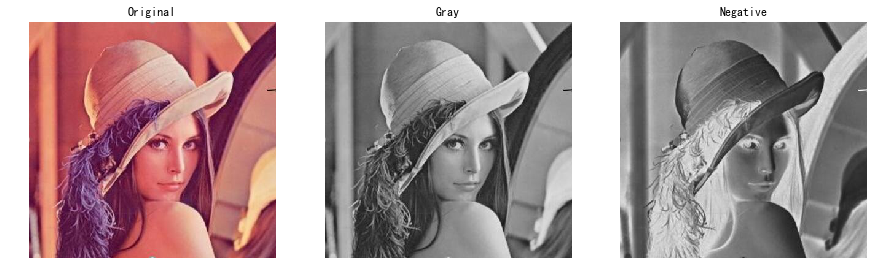

In [12]:
import matplotlib.pyplot as plt
img1 = Image.open('lane.jpg')
img2 = Image.open('lane_gray.jpg')
img3 = Image.open('lane_negative.jpg')

plt.figure(figsize=(15,5))

plt.subplot(1,3,1),plt.title('Original')
plt.imshow(img1),plt.axis('off')

plt.subplot(1,3,2),plt.title('Gray')
plt.imshow(img2),plt.axis('off')

plt.subplot(1,3,3),plt.title('Negative')
plt.imshow(img3),plt.axis('off')

plt.show()

In [28]:
from PIL import ImageFilter
from PIL import Image
test_image = "lane"
base = Image.open(test_image + ".jpg")

f1 = base.filter(ImageFilter.BLUR)
f1.save("./results/" + test_image + "_BLUR.jpg")

f2 = base.filter(ImageFilter.CONTOUR)
f2.save("./results/" + test_image + "_CONTOUR.jpg")

f3 = base.filter(ImageFilter.DETAIL)
f3.save("./results/" + test_image + "_DETAIL.jpg")

f4 = base.filter(ImageFilter.EDGE_ENHANCE)
f4.save("./results/" + test_image + "_EDGE_ENHANCE.jpg")

f5 = base.filter(ImageFilter.EMBOSS)
f5.save("./results/" + test_image + "_EMBOSS.jpg")

f6 = base.filter(ImageFilter.SHARPEN)
f6.save("./results/" + test_image + "_SHARPEN.jpg")

f7 = base.filter(ImageFilter.FIND_EDGES)
f7.save("./results/" + test_image + "_FINDEDGES.jpg")

f8 = base.filter(ImageFilter.RankFilter(size = 5, rank = 24))
f8.save("./results/" + test_image + "_RankFilter.jpg")


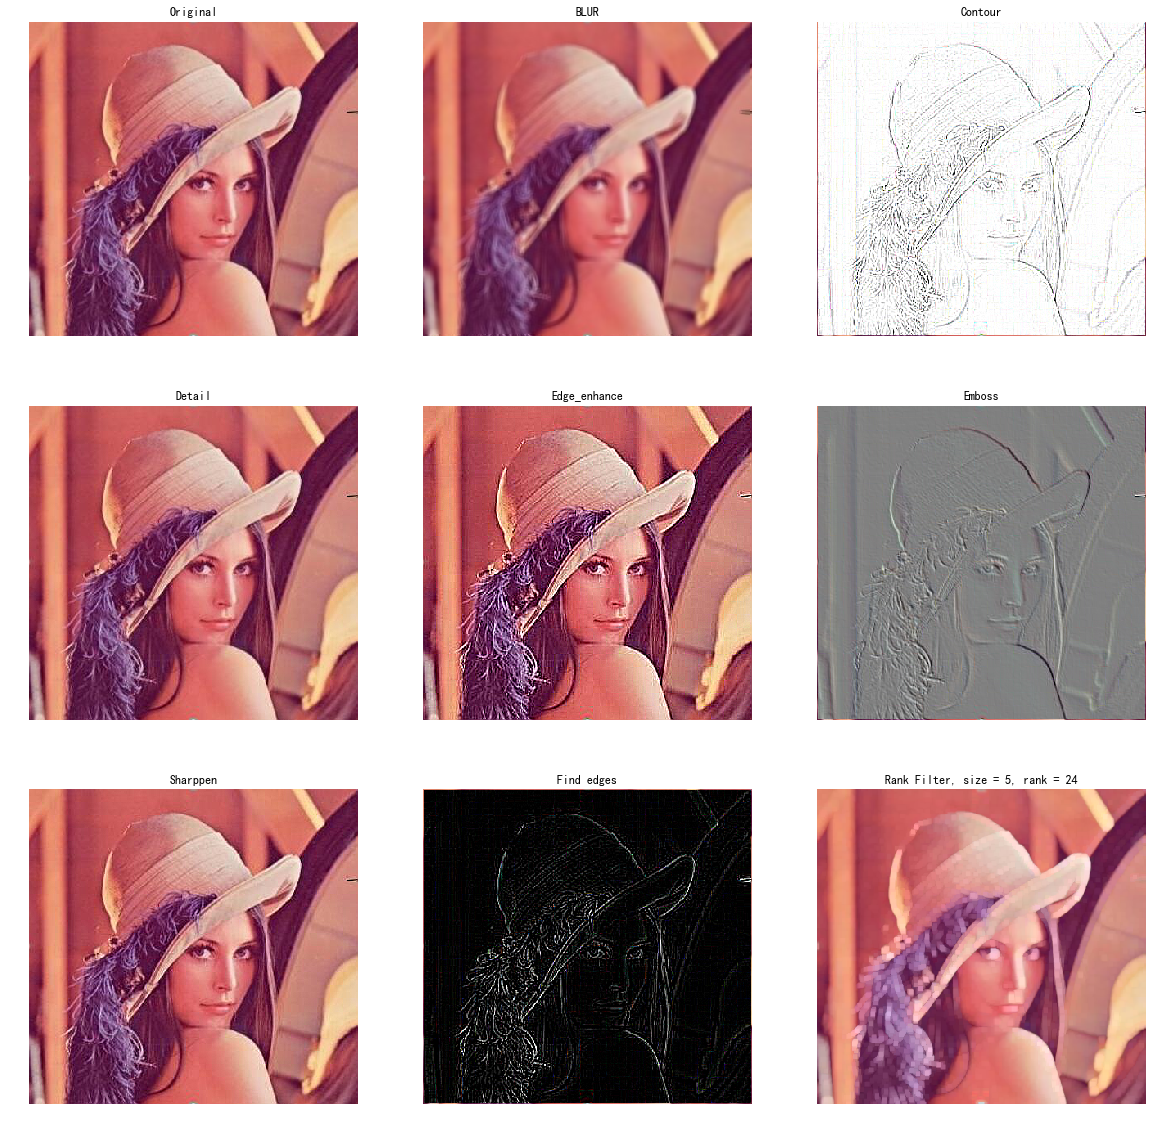

In [29]:
plt.figure(figsize=(20,20))

plt.subplot(3,3,1),plt.title('Original')
plt.imshow(base),plt.axis('off')

plt.subplot(3,3,2),plt.title('BLUR')
plt.imshow(f1),plt.axis('off')

plt.subplot(3,3,3),plt.title('Contour')
plt.imshow(f2),plt.axis('off')

plt.subplot(3,3,4),plt.title('Detail')
plt.imshow(f3),plt.axis('off')

plt.subplot(3,3,5),plt.title('Edge_enhance')
plt.imshow(f4),plt.axis('off')

plt.subplot(3,3,6),plt.title('Emboss')
plt.imshow(f5),plt.axis('off')


plt.subplot(3,3,7),plt.title('Sharppen')
plt.imshow(f6),plt.axis('off')

plt.subplot(3,3,8),plt.title('Find edges')
plt.imshow(f7),plt.axis('off')

plt.subplot(3,3,9),plt.title('Rank Filter, size = 5, rank = 24')
plt.imshow(f8),plt.axis('off')

plt.show()


## OpenCV test

In [31]:
import numpy as np
import cv2 as cv

bimg = "bert.jpg"
test_img = cv.imread(bimg)
print(test_img.shape)  # 高度，宽度，通道数
print(test_img.size)   # 像素数
print(test_img.dtype)  # 数据类型


(536, 613, 3)
985704
uint8


## HSV 色彩变换

D:\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


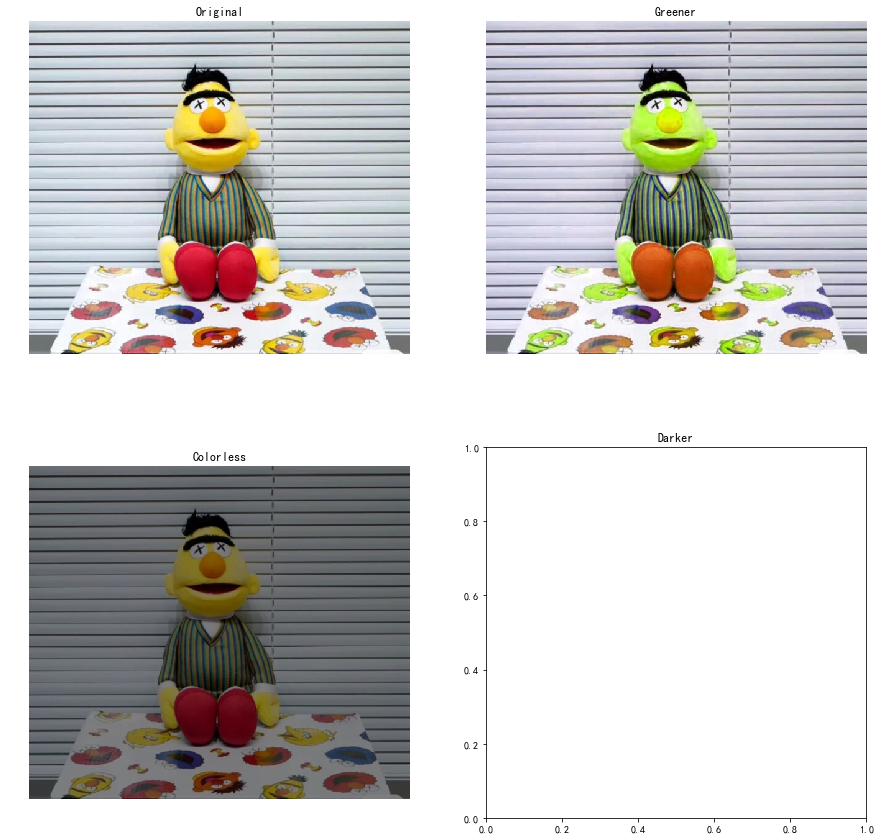

In [17]:
import cv2 as cv
import matplotlib.pyplot as plt
pic = "bert"
bimg = pic + ".jpg"


img = cv.imread(bimg)
img_hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)

# H空间中，绿色比黄色的值高一点，所以给每个像素+15，黄色的树叶就会变绿 
turn_green_hsv = img_hsv.copy()
turn_green_hsv[:, :, 0] = (turn_green_hsv[:, :, 0]+15) % 180  
turn_green_img = cv.cvtColor(turn_green_hsv, cv.COLOR_HSV2BGR)  
cv.imwrite(pic + '_turn_green.jpg', turn_green_img)

# 减小饱和度会让图像损失鲜艳，变得更灰
colorless_hsv = img_hsv.copy()
colorless_hsv[:, :, 1] = 0.5 * colorless_hsv[:, :, 1]  
colorless_img = cv.cvtColor(colorless_hsv, cv.COLOR_HSV2BGR)  
cv.imwrite(pic + '_colorless.jpg', colorless_img)

# 减小明度为原来一半
darker_hsv = img_hsv.copy()
darker_hsv[:, :, 2] = 0.5 * darker_hsv[:, :, 2]  
darker_img = cv.cvtColor(darker_hsv, cv.COLOR_HSV2BGR)  
cv.imwrite(pic + '_darker.jpg', darker_img)

plt.figure(figsize=(15,15))

plt.subplot(2,2,1), plt.title('Original')
tmp1 = cv.imread(pic + ".jpg",-1)
type(tmp1)
tmp1.shape
plt.imshow(np.flip(tmp1, axis = 2))
plt.axis('off')
           
plt.subplot(2,2,2),plt.title('Greener')
tmp2 = cv.imread(pic + "_turn_green.jpg",-1)
type(tmp2)
tmp2.shape
plt.imshow(np.flip(tmp2, axis = 2))
plt.axis('off')


plt.subplot(2,2,3),plt.title('Colorless')
# plt.imshow(cv.imread(pic + "_colorless.jpg", -1)),plt.axis('off')
tmp3 = cv.imread(pic + "_colorless.jpg",-1)
type(tmp3)
tmp3.shape
plt.imshow(np.flip(tmp3, axis = 2))
plt.axis('off')


plt.subplot(2,2,4),plt.title('Darker')
# plt.imshow(cv.imread(pic + "_darker.jpg", -1)),plt.axis('off')
plt.subplot(2,2,3),plt.title('Colorless')
tmp4 = cv.imread(pic + "_darker.jpg",-1)
type(tmp4)
tmp4.shape
plt.imshow(np.flip(tmp4, axis = 2))
plt.axis('off')

plt.show()

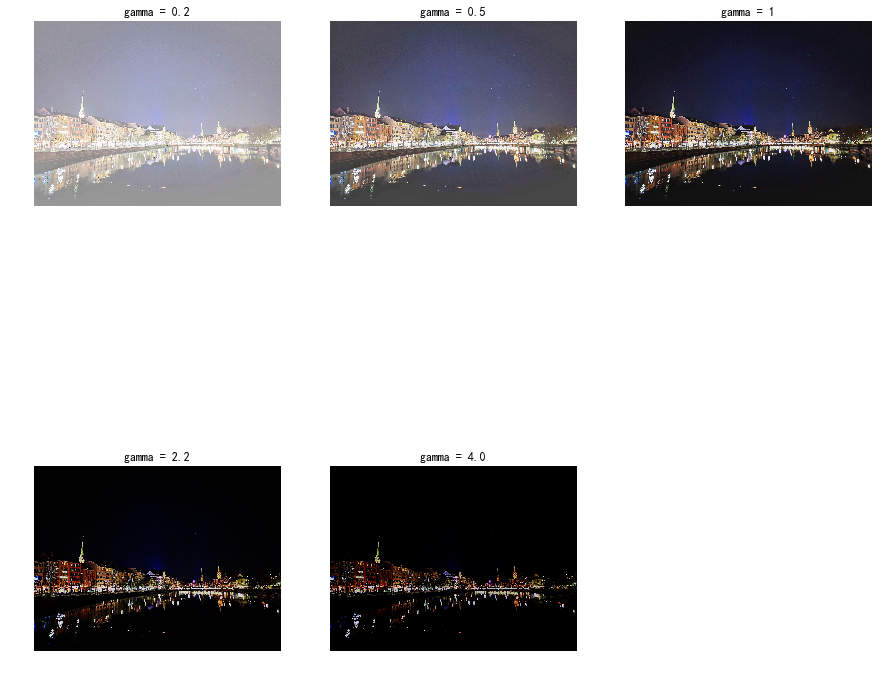

In [16]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
pic = "night"
bimg = pic + ".jpg"
img = cv.imread(bimg)

# 定义Gamma矫正的函数
def gamma_trans(img, gamma):
    # 具体做法是先归一化到1，然后gamma作为指数值求出新的像素值再还原
    gamma_table = [np.power(x / 255.0, gamma) * 255.0 for x in range(256)]  
    gamma_table = np.round(np.array(gamma_table)).astype(np.uint8)

# 实现这个映射用的是OpenCV的查表函数
    return cv.LUT(img, gamma_table)

plt.figure(figsize=(15,15))
# 执行Gamma矫正，小于1的值让暗部细节大量提升，同时亮部细节少量提升 
gamma_list = [0.2,0.5,1, 2.2,4.0]
i = 1
for g in gamma_list:
    img_corrected = gamma_trans(img, g)  
    cv.imwrite(pic + '_gamma_corrected_' + str(g) + '.jpg', img_corrected)
    plt.subplot(2,3,i), plt.title('gamma = ' + str(g))
    img_tmp = cv.imread(pic + '_gamma_corrected_' + str(g) + '.jpg')
    type(img_tmp)
    img_tmp.shape
    plt.imshow(np.flip(img_tmp, axis = 2))
   
    plt.axis('off')
    i = i + 1

plt.show()

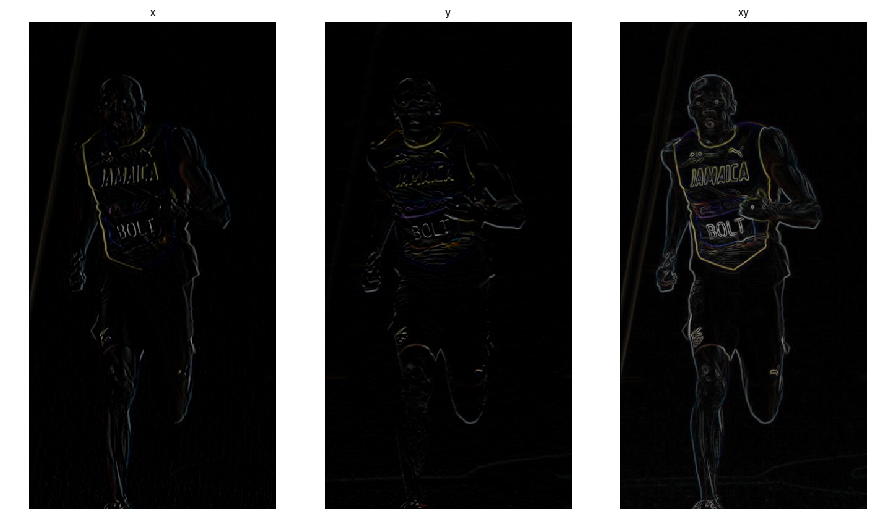

In [25]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
pic = "bolt"
img = cv.imread('bolt.jpg')
im = np.float32(img) / 255.0
# Calculate gradient
gx = cv.Sobel(img, cv.CV_32F, 1, 0, ksize=1)
cv.imwrite('bolt_x.jpg', gx)
gy = cv.Sobel(img, cv.CV_32F, 0, 1, ksize=1)
cv.imwrite('bolt_y.jpg', gy)
mag, angle = cv.cartToPolar(gx, gy, angleInDegrees=True)
cv.imwrite('bolt_xy.jpg', mag)

ll = ['x','y','xy']
i = 1
plt.figure(figsize=(15,15))
for g in ll:
    plt.subplot(1,3,i), plt.title(str(g))
    img_tmp = cv.imread(pic  + "_" + str(g) + '.jpg')
    type(img_tmp)
    img_tmp.shape
    plt.imshow(np.flip(img_tmp, axis = 2))
   
    plt.axis('off')
    i = i + 1

## MNIST svm hog

In [1]:
import cv2 as cv
import numpy as np
def deskew(img):
    SZ = 20
    m = cv.moments(img)
    if abs(m['mu02']) < 1e-2:
    # no deskewing needed.
        return img.copy()
    # Calculate skew based on central momemts.
    skew = m['mu11']/m['mu02']
    # Calculate affine transform to correct skewness.
    M = np.float32([[1, skew, -0.5*SZ*skew], [0, 1, 0]])
    # Apply affine transform
   
    img = cv.warpAffine(img, M, (SZ, SZ), flags=cv.WARP_INVERSE_MAP | cv.INTER_LINEAR)
    return img


In [2]:
import cv2 as cv
import numpy as np
bin_n = 16
def hog(img):
    gx = cv.Sobel(img, cv.CV_32F, 1, 0)
    gy = cv.Sobel(img, cv.CV_32F, 0, 1)
    mag, ang = cv.cartToPolar(gx, gy)
    bins = np.int32(bin_n*ang/(2*np.pi))    # quantizing binvalues in (0...16)
    bin_cells = bins[:10,:10], bins[10:,:10], bins[:10,10:], bins[10:,10:]
    mag_cells = mag[:10,:10], mag[10:,:10], mag[:10,10:], mag[10:,10:]
    hists = [np.bincount(b.ravel(), m.ravel(), bin_n) for b, m in zip(bin_cells, mag_cells)]
    hist = np.hstack(hists)     # hist is a 64 bit vector
    return hist

In [3]:
img = cv.imread('digits.png',0)
print(img.shape)
if img is None:
    raise Exception("we need the digits.png image from samples/data here !")

(1000, 2000)


In [4]:
cells = [np.hsplit(row,100) for row in np.vsplit(img,50)]  # 先 vslpit 垂直分成50份，之后 hsplit 水平分成100份

In [44]:
print(cells[47][99])  # 第一个参数是垂直，列数

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   0   0   0   0  18  73 125 157 167  67   7   0
    0   0]
 [  0   0   0   0   0   0   0   0  36 133 227 222 196 179 191 225 203  43
    0   0]
 [  0   0   0   0   0   0   0  46 210 221 101  49   3   0  10  47 169 165
    0   0]
 [  0   0   0   0   0   0  82 233 159  19   0   0   0   0   0   0  50 178
    8   0]
 [  0   0   0   0   0   0 139 233  74   7   0   0   2  67  28   0   0  28
   14   0]
 [  0   0   0   0   0   0  62 211 217 200 153 139 181 211  57   0   0   0
    0   0]
 [  0   0   0   0   0   0   0  19  83 119 159 255 242  85   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   0   0   0   0 117 252  90   0   0   0

In [5]:
train_cells = [ i[:90] for i in cells ]   # 前五十列
test_cells = [ i[90:] for i in cells]    # 后五十列, 每一列

In [6]:
print(len(test_cells[0]))

10


In [12]:
deskewed = [list(map(deskew,row)) for row in train_cells]  # 这里list(map())直接使用，才能直接调用函数，将结果存在list中
hogdata = [list(map(hog,row)) for row in deskewed]
trainData = np.float32(hogdata).reshape(-1,64)  # 构建训练集
responses = np.repeat(np.arange(10),450)[:,np.newaxis]   # 改变训练和测试的比例时，np.repeat(np.arrange(10), 这个参数要修改)

In [13]:
print(trainData.shape)
print(len(hogdata[0]))

(4500, 64)
90


In [14]:
print(responses.shape)

(4500, 1)


In [2]:
print(trainData[0])  # 共有2500个，每个由64维的向量表示

NameError: name 'trainData' is not defined

In [23]:
svm = cv.ml.SVM_create()
svm.setKernel(cv.ml.SVM_LINEAR)
svm.setType(cv.ml.SVM_C_SVC)
svm.setC(12.5)
svm.setGamma(0.50625)


In [24]:
svm.train(trainData, cv.ml.ROW_SAMPLE, responses)
svm.save('svm_data.dat')

In [25]:
deskewed = [list(map(deskew,row)) for row in test_cells]
hogdata = [list(map(hog,row)) for row in deskewed]
testData = np.float32(hogdata).reshape(-1,bin_n*4)
result = svm.predict(testData)[1]
re = np.repeat(np.arange(10), 50)[:,np.newaxis]  # 重新构建标签, y

In [26]:

mask = result==re 
correct = np.count_nonzero(mask)
print (correct*100.0/result.size)

94.4


In [22]:
re1 = re = np.repeat(np.arange(10), 50)
re = np.repeat(np.arange(10), 50)[:,np.newaxis] 
print(re1)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7
 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 8 8 8 8 8 8 8
 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8
 8 8 8 8 8 8 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9
 9 9 9 9 9 9 9 9 9 9 9 9 